#  Grand Projet de Machine Learning

*autrice* nom : HASSANI  prénom : Youmna

Choix de la thématique 

Projet n°9 : Prédiction de l'Attrition des Employés 

#### *INTRODUCTION*

Pour contextualiser mon projet portant sur la "Prédiction de l'Attrition des Employés", il me paraît essentiel de définir les éléments clés impliquée.

- Définition des Mots Clés :

**Attrition des employés** : phénomène désignant la perte et la réduction du personnel d'une entreprise, que ces effectifs soient remplacés ou non. Cela peut être dû à divers facteurs tels que l'insatisfaction au travail, de meilleures opportunités ailleurs, des problèmes de santé, ou des raisons personnelles. Ce phénomène est mesuré par le taux d'attrition qui indique le pourcentage d'employés partant sur une période donnée.

**Prédiction de l'attrition (Rétention des employés)**: La prédiction de l'attrition utilise des techniques d'analyse de données et de machine learning pour identifier les employés qui sont susceptibles de quitter l'organisation. Cela permet aux entreprises de prendre des mesures proactives pour retenir ces employés. Ce sont à terme des stratégies et pratiques pouvant être mises en place par une organisation pour maintenir ses employés et réduire le taux d'attrition.

*Contextualisation du Projet*

**Contexte Général**

L'attrition des employés est un problème majeur pour de nombreuses organisations. Elle peut avoir un impact significatif sur la productivité et le morale des employés restants. La perte de talents peut entraîner des coûts élevés pour le recrutement et la formation de nouveaux employés, ainsi qu'une perte de connaissances et d'expertise. En conséquence, la prédiction de l'attrition des employés est devenue une priorité pour les entreprises cherchant à maintenir leur compétitivité et à assurer la satisfaction de leurs employés.

**Impact Organisationnel**

L'attrition des employés peut sérieusement affecter la productivité et le moral d'une organisation. Des employés clés partant peuvent entraîner une perte de compétences essentielles et de connaissances institutionnelles, affectant ainsi l'efficacité globale de l'organisation.

**Importance de la Prédiction de l'Attrition**

La prédiction de l'attrition permet aux entreprises de prendre des mesures proactives pour retenir leurs employés les plus précieux. En utilisant des techniques de machine learning, les entreprises peuvent analyser les données des employés pour identifier les facteurs qui contribuent à l'attrition. Ces facteurs peuvent inclure la satisfaction au travail, l'équilibre entre vie professionnelle et vie personnelle, l'ancienneté, l'expérience, le salaire, et les données démographiques.

*Objectifs du Projet*

- **Construire un Modèle de Prédiction** : Développer un modèle de machine learning capable de prédire si un employé est susceptible de quitter l'entreprise.

- **Analyser les Facteurs Contributifs** : Identifier les facteurs qui contribuent le plus à l'attrition des employés.

- **Fournir des Recommandations** : Proposer des recommandations pour améliorer la rétention des employés.

In [1]:
%pip install imbalanced-learn
%pip install tabulate
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Chargement des Librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
#from imblearn.over_sampling import SMOTE

In [3]:
# Chargement des Données

df_1 = pd.read_csv("C:/Users/youmn/OneDrive/Bureau/FAC/Master 1/Formation/Machine Learning 2/base de données - projet/test.csv")
df_2 = pd.read_csv("C:/Users/youmn/OneDrive/Bureau/FAC/Master 1/Formation/Machine Learning 2/base de données - projet/train.csv")

print(df_1.shape)
print(df_2.shape)

(14900, 24)
(59598, 24)


In [4]:
# Je souhaite vérifier que les données possèdent bien les mêmes colonnes
# avant de les fusionner

# Obtenir les colonnes de chaque DataFrame
train_columns = df_2.columns
test_columns = df_1.columns

# Comparer les ensembles de colonnes
columns_comparison = train_columns.equals(test_columns)
column_difference_train = set(train_columns) - set(test_columns)
column_difference_test = set(test_columns) - set(train_columns)

print("Les colonnes sont identiques:", columns_comparison)
print("Colonnes dans train pas dans test:", column_difference_train)
print("Colonnes dans test pas dans train:", column_difference_test)


Les colonnes sont identiques: True
Colonnes dans train pas dans test: set()
Colonnes dans test pas dans train: set()


In [5]:
df_combined = pd.concat([df_1, df_2], axis=0) # On peut alors concaténer la
# base de données pour les procédures de pré traitement.

In [6]:
import pandas as pd

# Fonction pour obtenir le type des colonnes
def categorize_columns(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()
    datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()
    
    return {
        'Catégorielles': categorical_cols,
        'Numériques': numerical_cols,
        'Booléennes': boolean_cols,
        'Date/Heure': datetime_cols
    }

# Récupérer les types de colonnes dans le DataFrame
column_categories = categorize_columns(df_combined)

# Créer une liste pour stocker les données du tableau
table_data = []

# Ajouter les colonnes et leur type dans la liste
for category, columns in column_categories.items():
    for column in columns:
        table_data.append([column, category])

# Créer un DataFrame à partir de la liste
df_columns_info = pd.DataFrame(table_data, columns=['Nom de la Colonne', 'Type de Variable'])

# Transposer le DataFrame pour un affichage horizontal
df_columns_info_horizontal = df_columns_info.set_index('Nom de la Colonne').T

# Si vous utilisez un notebook, afficher le tableau en format tableau
df_columns_info_horizontal.style.set_caption("Description des Variables par Catégories et Types")


Nom de la Colonne,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Type de Variable,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Catégorielles,Numériques,Numériques,Numériques,Numériques,Numériques,Numériques,Numériques,Numériques


*Commentaires*

- Description des Variables de Notre Jeu de Données

**1. Gender** : Représente le sexe de l'employé  
**2. Job Role** : Indique le poste occupé par l'employé. Les rôles spécifiques peuvent avoir des taux d'attrition variés en raison des responsabilités et des conditions de travail associées  
**3. Work-Life Balance** : Évalue l'équilibre entre vie professionnelle et personnelle de l'employé.  
**4. Job Satisfaction** : Mesure la satisfaction de l'employé par rapport à son travail.  
**5. Performance Rating** : Évalue les performances de l'employé.  
**6. Overtime** : Indique si l'employé travaille des heures supplémentaires (Oui/Non).  
**7. Education Level** : Niveau d'éducation atteint par l'employé (par exemple, Bac, Licence, Master).  
**8. Marital Status** : Statut marital de l'employé  
**9. Job Level** : Niveau de poste de l'employé au sein de l'organisation.  
**10. Company Size** : aille de l'entreprise (par exemple, Petite, Moyenne, Grande).  
**11. Remote Work** : Indique si l'employé a la possibilité de travailler à distance.  
**12. Leadership Opportunities** : Mesure les opportunités de leadership disponibles pour l'employé.  
**13. Innovation Opportunities** : Évalue si l'employé a des opportunités de participer à des projets innovants.  
**14.Company Reputation** : La perception de la réputation de l'entreprise par l'employé.  
**15. Employee Recognition** : Indique si l'employé est reconnu pour ses contributions.  
**16. Attrition** : Variable cible indiquant si l'employé a quitté l'entreprise (Oui/Non).  
**17. Employee ID** : Identifiant unique de l'employé.  
**18. Age** : Âge de l'employé.  
**19. Years at Company** : Nombre d'années passées dans l'entreprise.  
**20. Monthly Income** : Salaire mensuel de l'employé.  
**21. Number of Promotions** : Nombre de promotions obtenues.  
**22. Distance from Home** : Distance entre le domicile de l'employé et le lieu de travail.  
**23. Number of Dependents** : Nombre de personnes à charge.  
**24. Company Tenure** : Durée totale d'emploi dans l'entreprise.  


#### *ANALYSE EXPLORATOIRE DES DONNEES*

Statistiques descriptives pour les variables numériques :
        Employee ID           Age  Years at Company  Monthly Income  \
count  74498.000000  74498.000000      74498.000000    74498.000000   
mean   37249.500000     38.529746         15.721603     7299.379514   
std    21505.864514     12.083456         11.223744     2152.508566   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18625.250000     28.000000          7.000000     5652.000000   
50%    37249.500000     39.000000         13.000000     7348.000000   
75%    55873.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74498.000000        74498.000000          74498.000000   
mean               0.832935           49.991584              1.650326   
std                0.995289           28.513611              1.553633   
min       

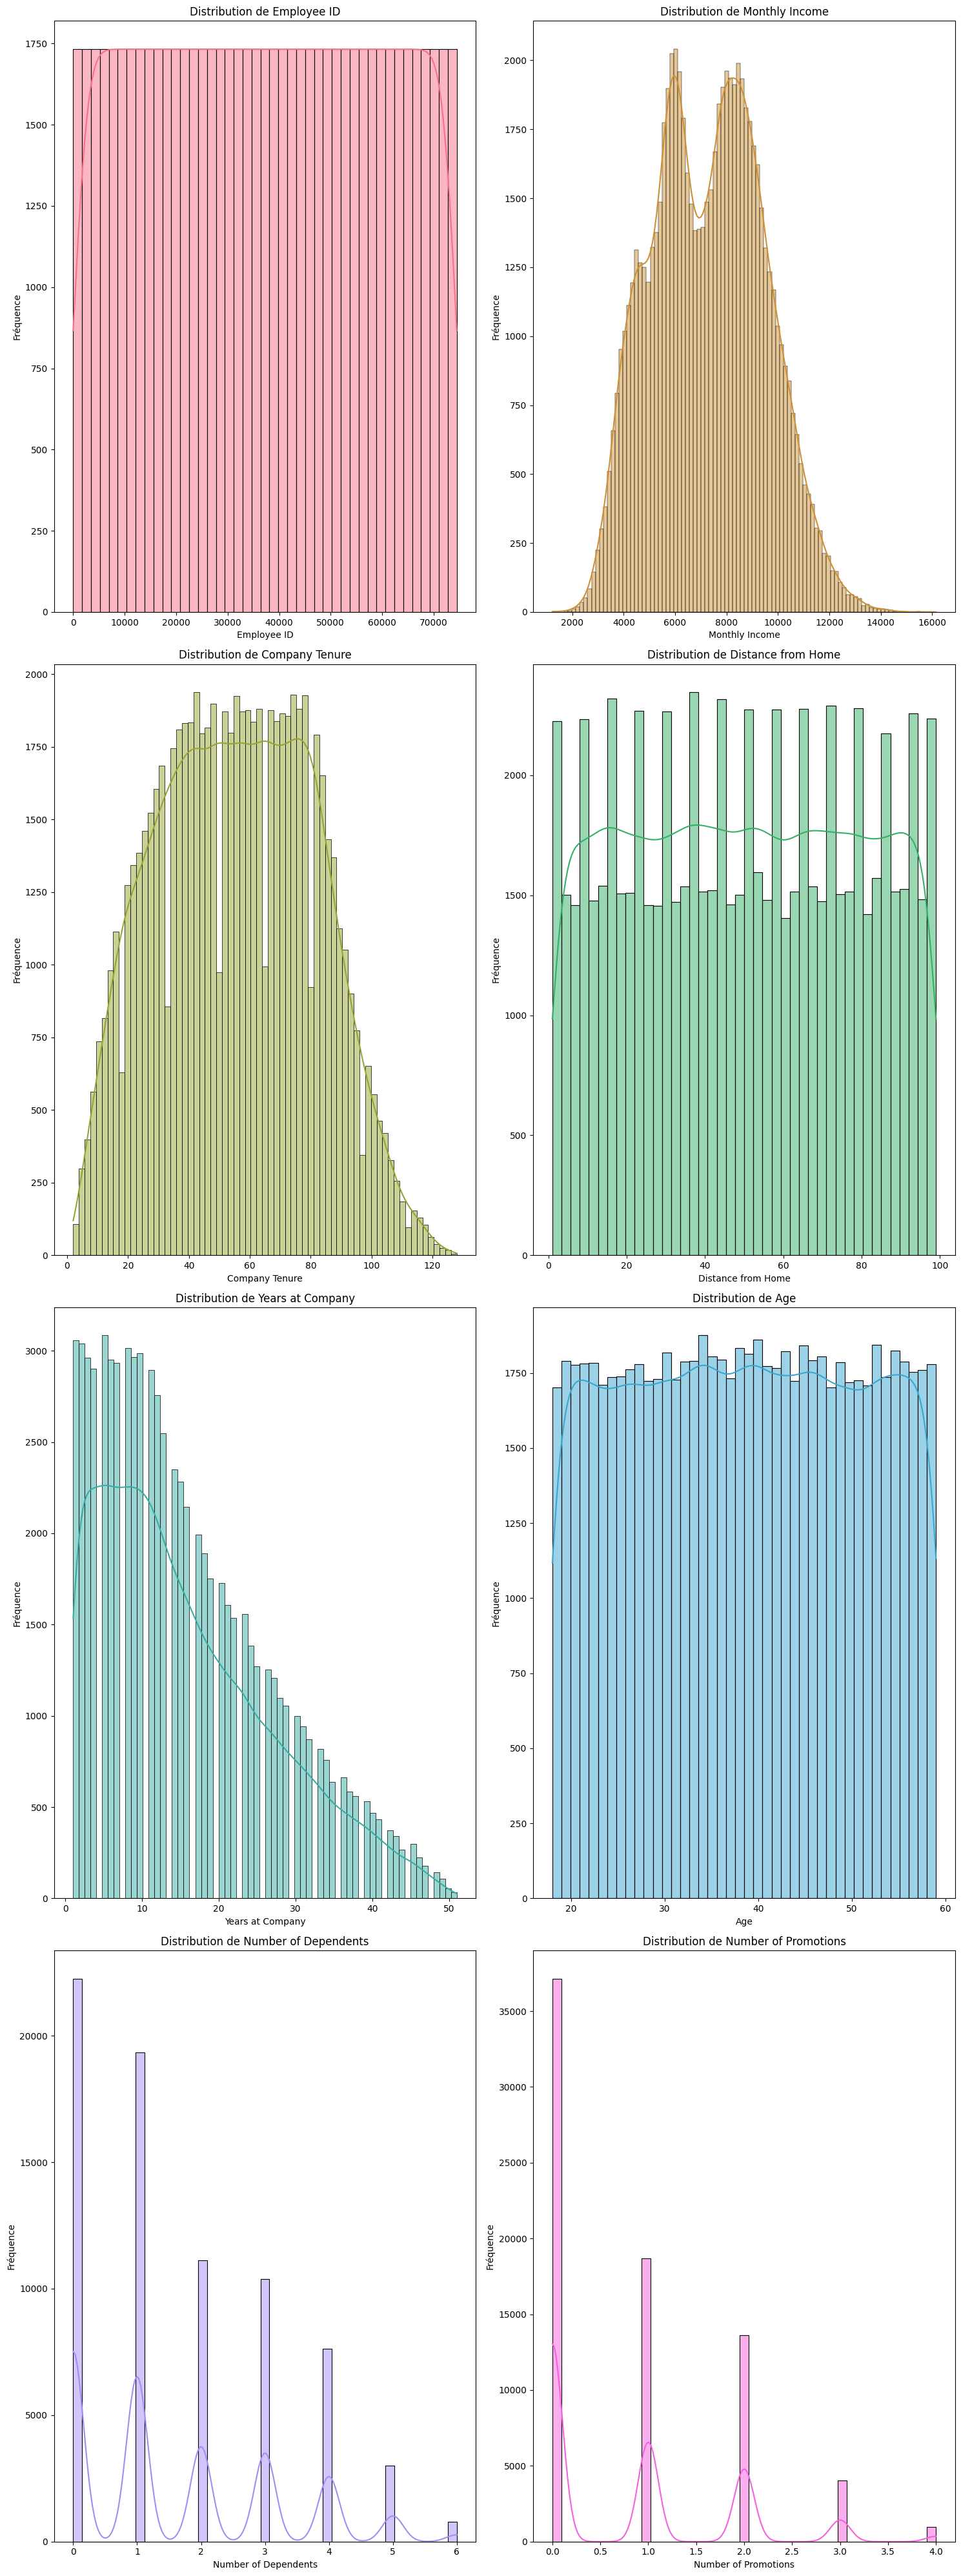

In [7]:
# Supposons que vos variables numériques sont définies comme suit
numeric_columns = ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 
                   'Distance from Home', 'Number of Dependents', 'Company Tenure']

# Statistiques descriptives pour les variables numériques
print("Statistiques descriptives pour les variables numériques :")
print(df_combined[numeric_columns].describe())

# Calculer les fréquences des valeurs pour chaque variable numérique
frequencies = {}
for column in numeric_columns:
    frequencies[column] = df_combined[column].value_counts().mean()

# Trier les colonnes par fréquence moyenne
sorted_columns = sorted(numeric_columns, key=lambda col: frequencies[col])

# Visualisation des variables numériques regroupées par fréquences similaires
num_plots = len(numeric_columns)
num_cols = 2  # Nombre de colonnes pour les sous-graphiques
num_rows = (num_plots + num_cols - 1) // num_cols  # Nombre de lignes nécessaires

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10 * num_rows))
axes = axes.flatten()

# Choisir une palette de couleurs
color_palette = sns.color_palette('husl', num_plots)  # 'husl' palette donne des couleurs distinctes et esthétiques

for i, column in enumerate(sorted_columns):
    sns.histplot(df_combined[column], kde=True, ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Distribution de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Fréquence')

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- *Interprétation des Statistiques Descriptives des Données Numériques* 


**1. Employee ID** : L'identifiant de l'employé est distribué de manière uniforme, ce qui est attendu pour un identifiant unique. Cela n'a pas de relation directe avec l'attrition mais est utilisé comme identifiant dans le dataset.  
Utilisation : Cette variable ne sera pas utile pour la prédiction de l'attrition car elle ne contient pas d'information pertinente sur le comportement de l'employé.  

**2. Monthly Income** : La distribution du revenu mensuel montre deux pics distincts, ce qui pourrait suggérer des groupes de salaire, peut-être liés à des niveaux de poste ou des rôles spécifiques. Un nombre significatif d'employés se situe dans des fourchettes de salaire moyen.  
Utilisation : Les employés ayant des revenus plus bas pourraient être plus enclins à quitter l'entreprise en quête de meilleures opportunités salariales. Le revenu est un facteur important à surveiller dans les modèles de prédiction de l'attrition.  

**3. Company Tenure** : La distribution de l'ancienneté dans l'entreprise montre une concentration d'employés avec une ancienneté relativement faible à modérée. Très peu d'employés ont une ancienneté au-delà de 100 mois (environ 8 ans).  
Utilisation : Une faible ancienneté peut être un indicateur de risque d'attrition, car les nouveaux employés s'adaptent encore à l'environnement de travail. Les stratégies de rétention devraient être particulièrement ciblées sur les nouveaux employés.

**4. Distance from Home** : La distance du domicile au lieu de travail est distribuée de manière assez uniforme. Cela suggère une diversité des distances parcourues par les employés pour se rendre au travail.  
Utilisation : Des distances plus longues pourraient être associées à une probabilité accrue d'attrition en raison du stress et du temps perdu en déplacement. Cette variable est importante pour comprendre le bien-être des employés et leur rétention.

**5. Years at Company** : Cette variable montre une forte concentration d'employés ayant moins de 10 ans d'ancienneté. Le nombre diminue fortement avec l'augmentation de l'ancienneté.  
Utilisation : Les employés ayant passé plus de temps dans l'entreprise peuvent être moins susceptibles de partir, à moins de manque d'opportunités de progression ou d'autres facteurs négatifs. Cette variable est cruciale pour analyser les tendances d'attrition.  

**6. Age** : L'âge des employés est distribué assez uniformément, avec une légère concentration d'employés dans la tranche d'âge de 30 à 50 ans.  
Utilisation : Les employés plus jeunes peuvent être plus enclins à explorer de nouvelles opportunités, tandis que ceux plus âgés peuvent rechercher la stabilité. L'âge est un facteur important pour segmenter les employés en fonction des stratégies de rétention.  

**7. Number of Dependents** : La plupart des employés ont peu ou pas de personnes à charge. Très peu d'employés ont plus de 3 personnes à charge.  
Utilisation : Les employés ayant un grand nombre de personnes à charge peuvent rechercher une stabilité financière et être moins enclins à quitter l'entreprise. Cette variable peut influencer l'attrition, surtout dans les contextes économiques difficiles.  

**8. Number of Promotions** : La majorité des employés n'ont eu aucune ou seulement une promotion. Les promotions multiples sont rares.  
 Un faible nombre de promotions pourrait être associé à une frustration concernant la progression de carrière, augmentant ainsi le risque d'attrition. Il est crucial de surveiller cette variable pour les employés cherchant des opportunités de croissance.  

C:\Users\youmn\AppData\Local\Temp\ipykernel_17852\514783264.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x=column, ax=axes[i], palette=palette)
C:\Users\youmn\AppData\Local\Temp\ipykernel_17852\514783264.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x=column, ax=axes[i], palette=palette)
C:\Users\youmn\AppData\Local\Temp\ipykernel_17852\514783264.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x=column, ax=axes[i], palette=palette)
C:\Users\youmn\AppData\Local\Te

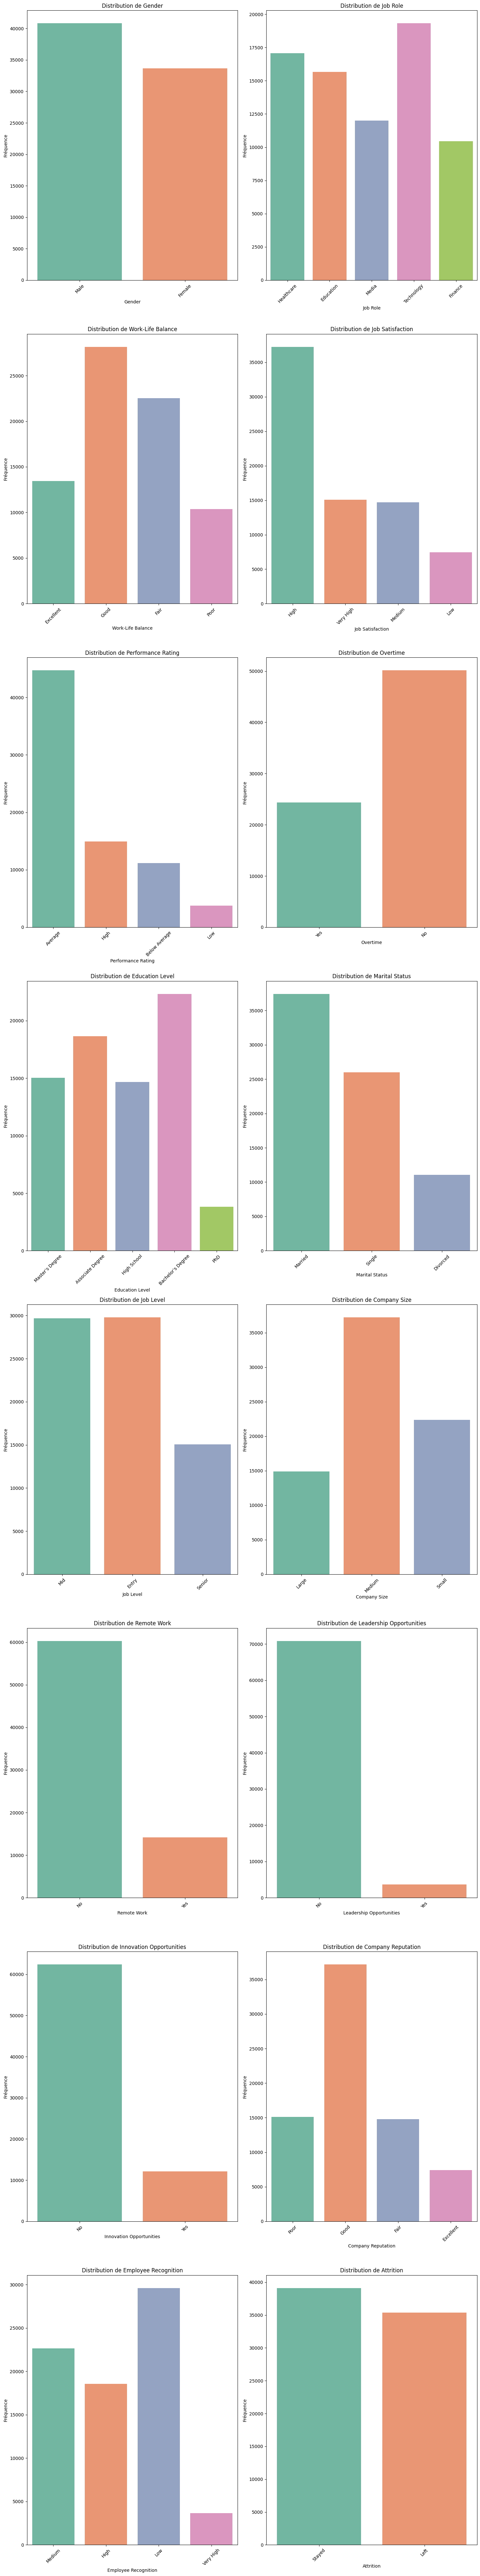

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = [
    'Gender',
    'Job Role',
    'Work-Life Balance',
    'Job Satisfaction',
    'Performance Rating',
    'Overtime',
    'Education Level',
    'Marital Status',
    'Job Level',
    'Company Size',
    'Remote Work',
    'Leadership Opportunities',
    'Innovation Opportunities',
    'Company Reputation',
    'Employee Recognition',
    'Attrition'
]


# Définir le nombre de graphiques et les dimensions de la figure
cat_plots = len(categorical_columns)
cat_cols = 2  # Nombre de colonnes pour les sous-graphiques
cat_rows = (cat_plots + cat_cols - 1) // cat_cols  # Nombre de lignes nécessaires

fig, axes = plt.subplots(cat_rows, cat_cols, figsize=(15, 10 * cat_rows))
axes = axes.flatten()

# Itérer à travers chaque colonne catégorielle
for i, column in enumerate(categorical_columns):
    # Utiliser une palette de couleurs spécifique
    palette = sns.color_palette("Set2", len(df_combined[column].unique()))  # Vous pouvez changer 'Set2' par d'autres palettes comme 'Set1', 'Pastel1', etc.
    
    sns.countplot(data=df_combined, x=column, ax=axes[i], palette=palette)
    axes[i].set_title(f'Distribution de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Fréquence')
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dans un premier temps nous cherchons à comprendre :

- Comment l'attrition se répartit-elle entre les employés qui sont restés et ceux qui ont quitté l'entreprise ?
- Quels rôles d'emploi sont les plus touchés par l'attrition et quelles pourraient être les implications pour les stratégies de rétention ?


In [9]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# 'df_combined' est le DataFrame contenant les colonnes 'Attrition' et 'Job Role'
# avec 'Left' pour les anciens employés et 'Stayed' pour les employés actuels.

# Préparation des données pour le graphique
attrition_rate = df_combined['Attrition'].value_counts(normalize=True).mul(100)
attrition_rate = attrition_rate.reset_index()
attrition_rate.columns = ['Attrition', 'Percent']

role_attrition = df_combined[df_combined['Attrition'] == 'Left']['Job Role'].value_counts(normalize=True).mul(100)
role_attrition = role_attrition.reset_index()
role_attrition.columns = ['Job Role', 'Percent']

# Configuration des couleurs pour chaque rôle d'emploi
colors = px.colors.qualitative.Set2  # Un ensemble de couleurs qualitatives

# Création des sous-graphiques
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Global Employee Attrition", "Employee Attrition by Job Role"),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

# Ajout du diagramme en barres pour l'attrition globale
fig.add_trace(
    go.Bar(x=attrition_rate['Attrition'], y=attrition_rate['Percent'], text=attrition_rate['Percent'],
           marker_color=['#7C2828', '#2B3E50'], texttemplate='%{text:.1f}%', textposition='outside'),
    row=1, col=1
)

# Ajout du diagramme à secteurs pour l'attrition par rôle d'emploi
fig.add_trace(
    go.Pie(labels=role_attrition['Job Role'], values=role_attrition['Percent'],
           hole=0.4, marker_colors=colors, textinfo='label+percent', textposition='inside', insidetextorientation='radial'),
    row=1, col=2
)

# Mise à jour des configurations du graphique
fig.update_layout(title_text="Employee Attrition Statistics",
                  plot_bgcolor='white', paper_bgcolor='white',
                  font=dict(size=12, color='black'),
                  showlegend=True)

fig.update_yaxes(title_text="Percentage", ticksuffix='%')

# Afficher le graphique
fig.show()


*Commentaires*  

**1. Global Employee Attrition (Attrition des employés globale)**  
La partie gauche du graphique montre que 52,5% des employés sont restés dans l'entreprise tandis que 47,5% ont quitté. Cela indique un taux d'attrition assez élevé, presque la moitié des effectifs. Cette donnée souligne l'importance de mettre en œuvre des stratégies efficaces de rétention des employés. Il est essentiel de comprendre les raisons spécifiques de ce haut taux d'attrition pour pouvoir les adresser efficacement.  

**2. Employee Attrition by Job Role (Attrition des employés par rôle de travail)**  
Ces données révèlent que les secteurs de la technologie et de la santé sont les plus touchés par l'attrition. Cela peut indiquer des tendances de marché où ces industries connaissent peut-être des changements rapides qui influencent la stabilité de l'emploi ou des conditions de travail moins favorables comparées à d'autres secteurs.

In [10]:
import pandas as pd
import plotly.express as px

# Assumons que df_combined est votre DataFrame qui contient les données nécessaires

# Calcul du pourcentage d'attrition pour chaque genre et rôle d'emploi
plot_df = df_combined.groupby(['Gender', 'Job Role', 'Attrition']).size().reset_index(name='Count')
total = plot_df.groupby(['Gender', 'Job Role'])['Count'].transform('sum')
plot_df['Percent'] = plot_df['Count'] / total * 100

# Utilisation de Plotly Express pour créer un graphique en barres empilées interactif
fig = px.bar(plot_df, x='Job Role', y='Percent', color='Attrition',
             pattern_shape='Gender', barmode='stack',
             category_orders={"Attrition": ["Stayed", "Left"]},  # Assurer l'ordre correct des légendes
             color_discrete_map={'Left': '#C02B34', 'Stayed': '#CDBBA7'},
             facet_col='Gender',  # Séparation par genre en colonnes différentes
             labels={'Percent': 'Attrition Percentage (%)', 'Job Role': 'Job Role', 'Attrition': 'Attrition Status'},
             title='Attrition Rates by Job Role and Gender')

# Mise à jour des paramètres de mise en page pour une meilleure visibilité
fig.update_layout(yaxis_ticksuffix='%', plot_bgcolor='white', font_color='black', 
                  title_x=0.5, legend_title_text='Attrition Status')
fig.update_traces(texttemplate='%{y:.2f}%', textposition='inside')
fig.update_xaxes(tickangle=45)

# Afficher le graphique
fig.show()


*Commentaires*  

- **Rôles de Technologie et Média** : Une proportion significativement plus élevée de femmes a quitté comparativement aux hommes dans ces rôles.
- **Rôles de Finance et Santé** : Les taux d'attrition entre hommes et femmes sont relativement proches, mais les femmes présentent toujours une légère tendance à quitter plus souvent que leurs homologues masculins.
- **Rôle d'Éducation** : C'est ici que l'écart entre les genres est le plus marqué, avec un pourcentage beaucoup plus élevé de femmes ayant quitté.

**Analyse de l'Impact du Genre sur l'Attrition** : Ce graphique a été créé pour explorer si le genre joue un rôle significatif dans l'attrition des employés et si cet impact varie selon les rôles professionnels. Cette analyse est cruciale pour identifier si des problèmes de rétention spécifiques au genre existent au sein de l'organisation.

In [11]:
import pandas as pd
import plotly.express as px

# 'df_combined' est le dataframe qui contient les colonnes 'Work-Life Balance', 'Gender', and 'Attrition'
# Tout d'abord, nous devons nous assurer que l'« attrition » est encodée comme « Oui » pour ceux qui sont partis et « Non » pour ceux qui sont restés.

# Prepare the data
plot_df = df_combined.groupby(['Work-Life Balance', 'Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Create the bar plot using Plotly
fig = px.bar(plot_df, 
             x='Work-Life Balance', 
             y='Percent', 
             color='Attrition',
             facet_row='Gender', 
             text='Percent', 
             opacity=0.75, 
             barmode='group',
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34', 'No': '#CDBBA7'})

# Update the figure with specific settings for better visualization
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))

fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202', ticksuffix='%')

fig.update_layout(title_text='Attrition Rates by Work-Life Balance and Gender',
                  height=750, 
                  font_color='#28221D',
                  xaxis_title='Work-Life Balance',
                  paper_bgcolor='#F4F2F0', 
                  plot_bgcolor='#F4F2F0',
                  xaxis=dict(tickmode='array', tickvals=[1, 2, 3, 4],
                             ticktext=['Poor', 'Neutral', 'Good', 'Excellent']))

# Show the plot
fig.show()


*Commentaires*

###### Graphique des Femmes (Premier Graphique)

**Couleurs:**
- Vert pour les employées restées
- Violet pour celles qui ont quitté

**Observations:**
Pour les femmes, les taux d'attrition augmentent lorsque l'équilibre travail-vie est jugé "fair" (équitable) par rapport à "good" (bon). Cela suggère qu'une perception moins bonne de cet équilibre pourrait être liée à une probabilité accrue de départ.

**Détails Importants:**
Le pic d'attrition à 63% pour un équilibre jugé "fair" souligne des problèmes potentiels dans les conditions de travail où les politiques de l'entreprise, qui pourraient affecter négativement l'engagement des employées.

###### Graphique des Hommes (Deuxième Graphique)

**Observations:**
La tendance est similaire chez les hommes, avec des taux d'attrition élevés pour ceux qui perçoivent un équilibre "poor" (médiocre). Le taux d'attrition diminue avec l'amélioration perçue de l'équilibre travail-vie.

**Détails Importants:**
Un équilibre travail-vie jugé "good" montre toujours un taux d'attrition relativement élevé chez les hommes (56%), suggérant que d'autres facteurs pourraient également jouer un rôle dans leur décision de quitter.

###### Reformulation des Explications

###### Graphique des Femmes (Premier Graphique)

**Couleurs:**
- Vert pour les employées restées
- Violet pour celles qui ont quitté

**Observations:**
Pour les femmes, les taux d'attrition augmentent lorsque l'équilibre travail-vie est jugé "fair" (équitable) par rapport à "good" (bon). Cela suggère qu'une perception moins bonne de cet équilibre pourrait être liée à une probabilité accrue de départ.

**Détails Importants:**
Le pic d'attrition à 63% pour un équilibre jugé "fair" souligne des problèmes potentiels dans les conditions de travail ou les politiques de l'entreprise, qui pourraient affecter négativement l'engagement des employées.

###### Graphique des Hommes (Deuxième Graphique)

**Observations:**
La tendance est similaire chez les hommes, avec des taux d'attrition élevés pour ceux qui perçoivent un équilibre "poor" (médiocre). Le taux d'attrition diminue avec l'amélioration perçue de l'équilibre travail-vie.

**Détails Importants:**
Un équilibre travail-vie jugé "good" montre toujours un taux d'attrition relativement élevé chez les hommes (56%), suggérant que d'autres facteurs pourraient également jouer un rôle dans leur décision de quitter.


In [12]:
import pandas as pd
import plotly.express as px

data = df_combined.copy()

# Vérifier les noms des colonnes
print(data.columns)

job_satisfaction = 'Job Satisfaction'  # Remplacez par le nom correct si nécessaire

# Calculer les taux d'attrition en fonction de la satisfaction au travail
plot_df = data.groupby(['Attrition'])['Job Satisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('Job Satisfaction')

# Remplacer les valeurs de JobSatisfaction par leurs catégories respectives
plot_df['Job Satisfaction'] = pd.Categorical(plot_df['Job Satisfaction'], categories=["Low", "Medium", "High", "Very High"], ordered=True)

# Créer le graphique à barres
fig = px.bar(plot_df, x='Job Satisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Left", "Stayed"]})

# Mettre à jour les traces pour améliorer l'apparence du graphique
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))

# Mettre à jour les axes et la mise en page du graphique
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09, font_color='#28221D',
                  xaxis_title='Job Satisfaction', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')

# Afficher le graphique
fig.show()


Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


In [13]:
import pandas as pd
import plotly.express as px

data = df_combined.copy()

# Vérifier les noms des colonnes
print(data.columns)

# Remplacez 'Job Satisfaction' par le nom correct de la colonne si nécessaire
job_satisfaction = 'Job Satisfaction'  # Remplacez par le nom correct si nécessaire

# Calculer les taux d'attrition en fonction de la satisfaction au travail et du genre
plot_df = data.groupby(['Attrition', 'Gender'])[job_satisfaction].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values(job_satisfaction)

# Remplacer les valeurs de JobSatisfaction par leurs catégories respectives
plot_df[job_satisfaction] = pd.Categorical(plot_df[job_satisfaction], categories=["Low", "Medium", "High", "Very High"], ordered=True)

# Créer le graphique à barres
fig = px.bar(plot_df, x=job_satisfaction, y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", facet_row="Gender", category_orders={"Attrition": ["Left", "Stayed"], "Gender": ["Female", "Male"]})

# Mettre à jour les traces pour améliorer l'apparence du graphique
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))

# Mettre à jour les axes et la mise en page du graphique
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction and Gender', bargap=.09, font_color='#28221D',
                  xaxis_title='Job Satisfaction', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')

# Afficher le graphique
fig.show()


Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


*Commentaires*

**Haute Satisfaction (High)** : Les taux d'attrition pour les employés très satisfaits sont étonnamment élevés pour les femmes (47.60%) par rapport aux hommes (47.16%). Une grande partie des employés qui ont quitté malgré une haute satisfaction peut indiquer des problèmes sous-jacents non liés directement à la satisfaction au travail, tels que des opportunités de carrière meilleures ailleurs ou des contraintes personnelles.  
**Satisfaction Moyenne (Medium) et Très Haute (Very High)** : Pour ces niveaux de satisfaction, les taux d'attrition sont généralement plus bas, surtout pour les hommes. Cela souligne l'effet protecteur d'une satisfaction professionnelle élevée sur la rétention des employés.  
**Faible Satisfaction (Low)** : Ici, les taux d'attrition sont plus élevés pour les femmes (19.08%) que pour les hommes (11.30%), ce qui pourrait révéler que les femmes sont moins enclines à rester dans des conditions de travail insatisfaisantes.

**Analyse de l'Influence de la Satisfaction au Travail et du Genre sur l'Attrition** : Ce graphique permet de distinguer comment la satisfaction au travail interagit avec le genre pour influencer les décisions des employés de rester ou partir. Comprendre ces dynamiques est crucial pour aborder les questions de diversité et d'inclusion et pour optimiser les stratégies de rétention.

In [14]:
import pandas as pd
import plotly.express as px

# Groupement par 'Marital Status', 'Gender' et 'Attrition' et calcul de l'attrition
plot_df = df_combined.groupby(['Marital Status', 'Gender', 'Attrition']).size().reset_index(name='Count')
plot_df['Total'] = plot_df.groupby(['Marital Status', 'Gender'])['Count'].transform('sum')
plot_df['Attrition Rate'] = (plot_df['Count'] / plot_df['Total']) * 100

# Création du graphique interactif avec facettes pour 'Attrition'
fig = px.bar(plot_df, x='Marital Status', y='Attrition Rate', color='Gender', text='Attrition Rate',
             facet_col='Attrition', category_orders={"Gender": ["Male", "Female"], "Marital Status": ["Single", "Married", "Divorced"]},
             color_discrete_map={'Male': '#1f77b4', 'Female': '#ff7f0e'})

# Mise à jour des traces pour l'affichage des pourcentages
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))

# Mise à jour de l'axe des y pour afficher un suffixe de pourcentage et autres détails de mise en page
fig.update_yaxes(title="Attrition Rate (%)", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Marital Status, Gender, and Attrition Status',
                  font_color='#28221D', yaxis=dict(title='Attrition Rate (%)'),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', xaxis_title='Marital Status')

# Affichage du graphique
fig.show()


*Commentaires*

**Taux d'Attrition par Statut Marital et Genre** :

- Célibataires : Les employés célibataires affichent le taux d'attrition le plus élevé (72.18 %). De ce groupe, une majorité significative est constituée d'hommes (62.29 %), suivie des femmes (27.82 %). Cela indique que les employés célibataires, en particulier les hommes, sont plus susceptibles de quitter l'organisation.  
- Mariés : Les employés mariés montrent un taux d'attrition plus faible (41.52 %), avec une prépondérance masculine (68.44 % restent, 31.56 % quittent). Cela peut suggérer que les responsabilités familiales et la stabilité personnelle jouent un rôle dans la décision de rester.  
- Divorcés : Les employés divorcés ont un taux d'attrition intermédiaire (46.43 %), avec une proportion presque équilibrée entre les sexes (36.13 % hommes, 46.43 % femmes).  

**Taux de Rétention par Statut Marital et Genre** :

Le graphique montre également des taux de rétention (employés qui restent). Les hommes mariés ont le taux de rétention le plus élevé (68.44 %), suivis par les hommes divorcés (63.87 %). Les femmes mariées et divorcées ont des taux de rétention plus faibles, indiquant une possible insatisfaction ou d'autres facteurs incitant au départ.

#### *ETAPE DE NETTOYAGE ET PRE TRAITEMENT DES DONNEES*

- Autre visualisaton de la variable numériques 'Monthly Income', se référer au graphique indiquant les distibutions pour les variables numériques et les diagrammes en bâtons pour les variables catégorielles

In [15]:
import pandas as pd
import plotly.express as px

data = df_combined.copy()

# Vérifier les noms des colonnes
#print(data.columns)


monthly_income_column = 'Monthly Income'  # Remplacez par le nom correct si nécessaire
attrition_column = 'Attrition'  # Remplacez par le nom correct si nécessaire

# Vérifier que les colonnes existent
if monthly_income_column not in data.columns or attrition_column not in data.columns:
    raise ValueError(f"Les colonnes '{monthly_income_column}' et/ou '{attrition_column}' n'existent pas dans le DataFrame.")

# Vérifier les valeurs uniques de la colonne 'Attrition'
print(data[attrition_column].unique())

# Trier les données par 'Attrition'
plot_df = data.sort_values(by=attrition_column)

# Créer l'histogramme avec le boxplot superposé
fig = px.histogram(plot_df, x=monthly_income_column, color=attrition_column,
                   opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                   color_discrete_map={'Left': '#C02B34', 'Stayed': '#CDBBA7'})

# Mettre à jour la mise en page du graphique
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density', font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')

# Afficher le graphique
fig.show()


['Stayed' 'Left']


- Gestion des valeurs manquantes

In [16]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = df_combined.isnull().mean() * 100

# Créer un DataFrame pour afficher les résultats de manière organisée
missing_values_df = missing_values_percentage.reset_index()
missing_values_df.columns = ['Nom de la Colonne', 'Pourcentage de Valeurs Manquantes']

# Trier les résultats par ordre décroissant de pourcentage de valeurs manquantes
missing_values_df = missing_values_df.sort_values(by='Pourcentage de Valeurs Manquantes', ascending=False)

# Transposer le DataFrame pour afficher les résultats à l'horizontal
missing_values_df_transposed = missing_values_df.set_index('Nom de la Colonne').T

# Afficher les résultats sous forme de tableau stylisé horizontal (utilisation recommandée dans Jupyter Notebook)
from IPython.display import display

# Utilisation de style pour une meilleure présentation
styled_missing_values_df_transposed = missing_values_df_transposed.style.set_caption("Pourcentage de Valeurs Manquantes par Colonne (Horizontal)") \
                                                 .background_gradient(cmap='coolwarm') \
                                                 .format('{:.2f}%')

# Afficher le tableau stylisé
display(styled_missing_values_df_transposed)


Nom de la Colonne,Employee ID,Age,Employee Recognition,Company Reputation,Innovation Opportunities,Leadership Opportunities,Remote Work,Company Tenure,Company Size,Job Level,Number of Dependents,Marital Status,Education Level,Distance from Home,Overtime,Number of Promotions,Performance Rating,Job Satisfaction,Work-Life Balance,Monthly Income,Job Role,Years at Company,Gender,Attrition
Pourcentage de Valeurs Manquantes,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


- Corrélation pour les variables numériques

In [17]:
import pandas as pd
import numpy as np

# Copie du DataFrame pour éviter de modifier les données originales
df_temp = df_combined.copy()

# Encodage temporaire de 'Attrition' avec des valeurs numériques
df_temp['Attrition'] = df_temp['Attrition'].map({'Stayed': 0, 'Left': 1})

# Sélection des colonnes numériques
numeric_columns = df_temp.select_dtypes(include=[np.number]).columns

# Encodage one-hot des variables catégorielles
categorical_columns = df_temp.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_temp, columns=categorical_columns)

# Combinaison des colonnes numériques et encodées
df_final = pd.concat([df_encoded[numeric_columns], df_encoded.drop(columns=numeric_columns)], axis=1)

# Calcul de la corrélation
correlation_matrix = df_final.corr()
attrition_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# Affichage des corrélations
print("Corrélation entre 'Attrition' et les autres variables :")
print(attrition_correlation)

Corrélation entre 'Attrition' et les autres variables :
Attrition                            1.000000
Marital Status_Single                0.283057
Job Level_Entry                      0.258141
Remote Work_No                       0.221191
Work-Life Balance_Fair               0.132894
Work-Life Balance_Poor               0.102334
Gender_Female                        0.100637
Distance from Home                   0.093836
Company Reputation_Poor              0.086308
Overtime_Yes                         0.056019
Job Satisfaction_Very High           0.055985
Performance Rating_Low               0.044012
Company Reputation_Fair              0.042791
Job Satisfaction_Low                 0.035430
Performance Rating_Below Average     0.034483
Company Size_Small                   0.028760
Innovation Opportunities_No          0.021548
Education Level_Bachelor’s Degree    0.019288
Education Level_Associate Degree     0.013829
Education Level_Master’s Degree      0.013424
Job Role_Education      

*Interprétation*  

La plupart des variables ont des corrélations faibles (proches de zéro) avec la variable cible Attrition, cela suggère qu'il n'y a pas de relation linéaire forte entre ces variables et "Attrition".  

Les corrélations faibles ne signifient pas nécessairement que les variables sont inutiles pour la prédiction. Elles peuvent encore contenir des informations précieuses qui ne sont pas capturées par des relations linéaires. Des modèles plus complexes comme les arbres de décision, les forêts aléatoires ou les réseaux de neurones peuvent mieux capter ces relations. Nous n'avons pas de redondance au niveau des variables numériques car le lien statistique n'est pas élevé.

In [18]:
import pandas as pd
import numpy as np

# Copie du DataFrame pour éviter de modifier les données originales
df_temp = df_combined.copy()

# Encodage temporaire de 'Attrition' avec des valeurs numériques
df_temp['Attrition'] = df_temp['Attrition'].map({'Stayed': 0, 'Left': 1})

# Sélection des colonnes numériques
numeric_columns = df_temp.select_dtypes(include=[np.number]).columns

# Encodage one-hot des variables catégorielles
categorical_columns = df_temp.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_temp, columns=categorical_columns)

# Combinaison des colonnes numériques et encodées
df_final = pd.concat([df_encoded[numeric_columns], df_encoded.drop(columns=numeric_columns)], axis=1)

# Calcul de la corrélation
correlation_matrix = df_final.corr()
attrition_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# Création d'un DataFrame pour afficher les résultats
corr_df = pd.DataFrame(attrition_correlation).T

# Affichage des corrélations sous forme de tableau horizontal
print("Corrélation entre 'Attrition' et les autres variables :")
print(corr_df)

Corrélation entre 'Attrition' et les autres variables :
           Attrition  Marital Status_Single  Job Level_Entry  Remote Work_No  \
Attrition        1.0               0.283057         0.258141        0.221191   

           Work-Life Balance_Fair  Work-Life Balance_Poor  Gender_Female  \
Attrition                0.132894                0.102334       0.100637   

           Distance from Home  Company Reputation_Poor  Overtime_Yes  ...  \
Attrition            0.093836                 0.086308      0.056019  ...   

           Number of Dependents  Number of Promotions  \
Attrition             -0.074606             -0.081184   

           Company Reputation_Good  Gender_Male  Education Level_PhD  \
Attrition                -0.089523    -0.100637            -0.107316   

           Work-Life Balance_Good  Work-Life Balance_Excellent  \
Attrition               -0.110919                    -0.111051   

           Remote Work_Yes  Marital Status_Married  Job Level_Senior  
Attrition  

In [19]:
import pandas as pd
import numpy as np

# Copie du DataFrame pour éviter de modifier les données originales
df_temp = df_combined.copy()

# Encodage temporaire de 'Attrition' avec des valeurs numériques
df_temp['Attrition'] = df_temp['Attrition'].map({'Stayed': 0, 'Left': 1})

# Sélection des colonnes numériques
numeric_columns = df_temp.select_dtypes(include=[np.number]).columns

# Encodage one-hot des variables catégorielles
categorical_columns = df_temp.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_temp, columns=categorical_columns)

# Calcul de la corrélation
correlation_matrix = df_encoded.corr()
attrition_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# Création d'un DataFrame pour afficher les résultats
corr_df = attrition_correlation.reset_index().T

# Renommer les colonnes pour plus de clarté
corr_df.columns = corr_df.iloc[0]
corr_df = corr_df.drop(corr_df.index[0])

# Affichage des corrélations sous forme de tableau horizontal
print("Corrélation entre 'Attrition' et les autres variables :")
print(corr_df)

# Optionnel : Affichage avec pandas pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
print(corr_df)

Corrélation entre 'Attrition' et les autres variables :
index     Attrition Marital Status_Single Job Level_Entry Remote Work_No  \
Attrition       1.0              0.283057        0.258141       0.221191   

index     Work-Life Balance_Fair Work-Life Balance_Poor Gender_Female  \
Attrition               0.132894               0.102334      0.100637   

index     Distance from Home Company Reputation_Poor Overtime_Yes  ...  \
Attrition           0.093836                0.086308     0.056019  ...   

index     Number of Dependents Number of Promotions Company Reputation_Good  \
Attrition            -0.074606            -0.081184               -0.089523   

index     Gender_Male Education Level_PhD Work-Life Balance_Good  \
Attrition   -0.100637           -0.107316              -0.110919   

index     Work-Life Balance_Excellent Remote Work_Yes Marital Status_Married  \
Attrition                   -0.111051       -0.221191              -0.230138   

index     Job Level_Senior  
Attrition

In [22]:
import pandas as pd
import numpy as np

# Copie du DataFrame pour éviter de modifier les données originales
df_temp = df_combined.copy()

# Encodage temporaire de 'Attrition' avec des valeurs numériques
df_temp['Attrition'] = df_temp['Attrition'].map({'Stayed': 0, 'Left': 1})

# Sélection des colonnes numériques
numeric_columns = df_temp.select_dtypes(include=[np.number]).columns

# Encodage one-hot des variables catégorielles
categorical_columns = df_temp.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_temp, columns=categorical_columns)

# Calcul de la corrélation
correlation_matrix = df_encoded.corr()
attrition_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# Création d'un DataFrame pour afficher les résultats
corr_df = pd.DataFrame(attrition_correlation).reset_index()
corr_df.columns = ['Variable', 'Correlation']

# Transposer pour obtenir un tableau horizontal
corr_df = corr_df.T

# Renommer les colonnes pour plus de clarté
corr_df.columns = corr_df.iloc[0]
corr_df = corr_df.drop(corr_df.index[0])

# Affichage des corrélations sous forme de tableau horizontal
print("Corrélation entre 'Attrition' et les autres variables :")
print(corr_df)

# Optionnel : Affichage avec pandas pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
print(corr_df)

Corrélation entre 'Attrition' et les autres variables :
Variable    Attrition Marital Status_Single Job Level_Entry Remote Work_No  \
Correlation       1.0              0.283057        0.258141       0.221191   

Variable    Work-Life Balance_Fair Work-Life Balance_Poor Gender_Female  \
Correlation               0.132894               0.102334      0.100637   

Variable    Distance from Home Company Reputation_Poor Overtime_Yes  \
Correlation           0.093836                0.086308     0.056019   

Variable    Job Satisfaction_Very High Performance Rating_Low  \
Correlation                   0.055985               0.044012   

Variable    Company Reputation_Fair Job Satisfaction_Low  \
Correlation                0.042791              0.03543   

Variable    Performance Rating_Below Average Company Size_Small  \
Correlation                         0.034483            0.02876   

Variable    Innovation Opportunities_No Education Level_Bachelor’s Degree  \
Correlation                  

In [54]:
# Détection des outliers avec l'IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Analyser les outliers pour chaque variable numérique et calculer le pourcentage
for column in numeric_columns:
    outliers = detect_outliers_iqr(df_combined, column)
    total_values = len(df_combined[column])
    outlier_percentage = (len(outliers) / total_values) * 100
    print(f'Pourcentage d\'outliers pour {column}: {outlier_percentage:.2f}%')


Pourcentage d'outliers pour Employee ID: 0.00%
Pourcentage d'outliers pour Age: 0.00%
Pourcentage d'outliers pour Years at Company: 0.45%
Pourcentage d'outliers pour Monthly Income: 0.09%
Pourcentage d'outliers pour Number of Promotions: 0.00%
Pourcentage d'outliers pour Distance from Home: 0.00%
Pourcentage d'outliers pour Number of Dependents: 0.00%
Pourcentage d'outliers pour Company Tenure: 0.00%
Pourcentage d'outliers pour Attrition: 0.00%


*Commentaires*

D'après les résultats, il y a très peu d'outliers dans les variables numériques analysées. Cela signifie que la plupart des valeurs se situent dans la plage normale, ce qui est généralement souhaitable pour les analyses statistiques.

Pour la variable "Years at Company", 0.45% des valeurs sont considérées comme des outliers. Cela pourrait indiquer que quelques employés ont un nombre d'années d'ancienneté significativement différent de la majorité.  
Pour la variable "Monthly Income", 0.09% des valeurs sont considérées comme des outliers. Cela pourrait indiquer que quelques employés ont un revenu mensuel significativement différent de la majorité.

- Analyse des corrélations pour les variables catégorielles numériques

In [55]:
import pandas as pd
import plotly.figure_factory as ff

df = df_combined.copy()

# Identifier les colonnes catégorielles et celles avec faible cardinalité
cat_cols = []
for i in df.columns:
    if df[i].nunique() <= 5 or df[i].dtype == object:
        cat_cols.append(i)

# Supprimer les colonnes catégorielles et à faible cardinalité
df.drop(cat_cols, axis=1, inplace=True)

# Supprimer des colonnes spécifiques qui ne sont pas pertinentes pour la corrélation (exemple: identifiant unique)
df.drop('Employee ID', axis=1, inplace=True, errors='ignore')  # Remplacer 'Employee ID' par toute autre colonne non pertinente

# Calculer la matrice de corrélation
corr = df.corr().round(2)

# Extraire les index, colonnes et valeurs de la matrice pour la heatmap
x = corr.index.tolist()
y = corr.columns.tolist()
z = corr.to_numpy()

# Créer une heatmap annotée avec Plotly
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y} = %{z}",
                                  colorscale='GnBu')

# Inverser l'axe des y pour une lecture traditionnelle
fig.update_yaxes(autorange="reversed")

# Configurer le titre et la mise en page
fig.update_layout(title="Matrice de Corrélation des Variables Numériques", 
                  font_color='#28221D', margin=dict(t=180), height=600)

# Afficher la heatmap
fig.show()


*Interprétation*  

- **Age et Years at Company (Corrélation : 0.54)** :
Il existe une corrélation modérée positive entre l'âge des employés et le nombre d'années passées dans l'entreprise. Cela signifie que, généralement, les employés plus âgés ont tendance à avoir une plus longue ancienneté dans l'entreprise. Cela peut être dû au fait que les employés restent dans l'entreprise à mesure qu'ils avancent dans leur carrière.

- **Age et Company Tenure (Corrélation : 0.24)** :  
Une corrélation faible positive suggère qu'il y a une légère tendance pour les employés plus âgés à avoir une tenure plus longue au sein de l'entreprise. Cependant, ce n'est pas une relation forte.

- **Years at Company et Company Tenure (Corrélation : 0.44)** :  
Il y a une corrélation modérée positive, ce qui signifie que les années passées dans l'entreprise par un employé sont modérément liées à leur tenure totale. Cela semble logique, car plus un employé travaille longtemps dans une entreprise, plus sa tenure s'allonge.  

- **Autres Corrélations (Proches de 0)** :
Monthly Income, Distance from Home, Number of Dependents : Ces variables montrent une faible ou aucune corrélation avec les autres variables, ce qui suggère qu'elles sont relativement indépendantes les unes des autres en termes de relations linéaires.

**Détection de la Multicolinéarité**  
*Critères de Multicolinéarité* : La multicolinéarité est généralement une préoccupation lorsque les coefficients de corrélation sont élevés (typiquement > 0.8 ou < -0.8). 
Dans cette matrice de corrélation, la plus forte corrélation observée est de 0.54 entre Age et Years at Company.  
Conclusion sur la Multicolinéarité :   Il n'y a pas de preuves significatives de multicolinéarité dans cette matrice de corrélation. Les corrélations modérées (0.54 et 0.44) n'atteignent pas les niveaux qui causeraient des problèmes majeurs dans les modèles linéaires. Cependant, elles indiquent des relations importantes à considérer.

- Test du Chi-2

Pour déterminer s'il existe une relation entre l'*attrition* et les autres variables catégorielles de l'ensemble de données, j'utilise le test d'indépendance du chi-carré.   L'hypothèse nulle de ce test est que les variables sont indépendantes et qu'il n'y a pas de lien entre l'attrition et la variable testée, tandis que l'hypothèse alternative est qu'il existe une relation.

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# Liste des variables catégorielles
categorical_vars = [
    "Gender", "Job Role", "Work-Life Balance", "Job Satisfaction",
    "Performance Rating", "Overtime", "Education Level", "Marital Status",
    "Job Level", "Company Size", "Remote Work", "Leadership Opportunities",
    "Innovation Opportunities", "Company Reputation", "Employee Recognition"
]

# Initialisation des listes pour stocker les résultats
chi_statistic = []
p_val = []
vars_rm = []

# Boucle pour effectuer le test du chi-carré pour chaque variable catégorielle
for var in categorical_vars:
    observed = pd.crosstab(index=df_combined["Attrition"], columns=df_combined[var])
    stat, p, dof, expected = chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print(f"Attrition and {var} are independent (p-value = {p:.2f}).\n")
        vars_rm.append(var)

# Création d'un DataFrame pour afficher les résultats
chi_df = pd.DataFrame()
chi_df["Variable"] = categorical_vars
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df = chi_df[chi_df.P_value < 0.05].sort_values("P_value", ascending=True)

# Affichage du DataFrame des résultats
display(chi_df)

Attrition and Employee Recognition are independent (p-value = 0.12).



,Variable,Chi_Statistic,P_value
2,Work-Life Balance,2912.497416,0.000000e+00
7,Marital Status,6046.959578,0.000000e+00
8,Job Level,7496.507050,0.000000e+00
10,Remote Work,3643.736615,0.000000e+00
13,Company Reputation,887.587512,4.358677e-192
6,Education Level,859.316750,1.086104e-184
0,Gender,754.099558,5.152443e-166
3,Job Satisfaction,388.237290,7.815320e-84
4,Performance Rating,257.107073,1.899263e-55
5,Overtime,233.544813,1.005317e-52


*ETAPE DE PRE TRAITEMENT DU DATASET EN VUE DE REALISER LA MODELISATION*

1. Encodage des variables catégorielles & Division des Données

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# PARTIE ENCODAGE DES VARIABLES

# Copie du DataFrame original
df = df_combined.copy()

# Encodage de la variable cible 'Attrition'
df['Attrition'] = df['Attrition'].map({'Stayed': 0, 'Left': 1})

# Nettoyage des valeurs de 'Education Level' pour garantir la correspondance
df['Education Level'] = df['Education Level'].replace({
    "’": "'", 
    "‘": "'", 
    "‘": "'", 
    "´": "'", 
    "′": "'", 
    "’": "'", 
    "‘": "'", 
    "’": "'"
}, regex=True)
df['Education Level'] = df['Education Level'].str.strip()  # Supprimer les espaces blancs au début et à la fin

# Vérification des valeurs uniques dans 'Education Level'
print("Valeurs uniques dans 'Education Level' après nettoyage:", df['Education Level'].unique())

# Variables pour One-Hot Encoding
one_hot_vars = ['Gender', 'Marital Status', 'Overtime', 'Remote Work', 'Job Level', 'Job Role']
df_encoded = pd.get_dummies(df, columns=one_hot_vars, drop_first=True)

# Fonction pour le Label Encoding personnalisé
def custom_label_encoder(data, order):
    le = LabelEncoder()
    le.fit(order)
    return le.transform(data)

# Application du Label Encoding avec ordre spécifié
education_order = ['High School', 'Associate Degree', "Bachelor's Degree", "Master's Degree", 'PhD']
df_encoded['Education Level'] = custom_label_encoder(df_encoded['Education Level'], education_order)

df_encoded['Performance Rating'] = custom_label_encoder(df_encoded['Performance Rating'],
    ['Low', 'Below Average', 'Average', 'High'])
df_encoded['Work-Life Balance'] = custom_label_encoder(df_encoded['Work-Life Balance'],
    ['Poor', 'Fair', 'Good', 'Excellent'])
df_encoded['Job Satisfaction'] = custom_label_encoder(df_encoded['Job Satisfaction'],
    ['Low', 'Medium', 'High', 'Very High'])

# Fonction pour le Frequency Encoding
def frequency_encoding(column):
    frequencies = df[column].value_counts(normalize=True)
    return df[column].map(frequencies)

# Application du Frequency Encoding
freq_encode_vars = ['Company Size', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
for var in freq_encode_vars:
    df_encoded[var] = frequency_encoding(var)

# Sélection des variables numériques (pas besoin d'encodage)
numeric_vars = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
                'Distance from Home', 'Number of Dependents', 'Company Tenure']

# Création du DataFrame final pour la modélisation
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Nettoyage des noms de colonnes
X.columns = X.columns.str.replace(' ', '')

# Suppression de la variable 'Employee ID'
if 'EmployeeID' in X.columns:
    X = X.drop('EmployeeID', axis=1)

print("Shape of X:", X.shape)
print("\nFirst few rows of encoded data:")
print(X.head())
print("\nDistribution of target variable:")
print(y.value_counts(normalize=True))

Valeurs uniques dans 'Education Level' après nettoyage: ["Master's Degree" 'Associate Degree' 'High School' "Bachelor's Degree"
 'PhD']
Shape of X: (74498, 27)

First few rows of encoded data:
   Age  YearsatCompany  MonthlyIncome  Work-LifeBalance  JobSatisfaction  \
0   36              13           8029                 0                0   
1   35               7           4563                 2                0   
2   50               7           5583                 1                0   
3   58              44           5525                 1                3   
4   39              24           4604                 2                0   

   PerformanceRating  NumberofPromotions  DistancefromHome  EducationLevel  \
0                  0                   1                83               3   
1                  0                   1                55               0   
2                  0                   3                14               0   
3                  2                  

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display

# PARTIE ENCODAGE DES DONNEES

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Copie du DataFrame original
df = df_combined.copy()

# Encodage de la variable cible 'Attrition'
df['Attrition'] = df['Attrition'].map({'Stayed': 0, 'Left': 1})

# Nettoyage des valeurs de 'Education Level'
df['Education Level'] = df['Education Level'].replace({"’": "'", "‘": "'", "´": "'", "′": "'"}, regex=True)
df['Education Level'] = df['Education Level'].str.strip()

# Vérification des valeurs uniques dans 'Education Level'
display("Valeurs uniques dans 'Education Level' après nettoyage:", df['Education Level'].unique())

# Variables pour One-Hot Encoding
one_hot_vars = ['Gender', 'Marital Status', 'Overtime', 'Remote Work', 'Job Level', 'Job Role']
df_encoded = pd.get_dummies(df, columns=one_hot_vars, drop_first=True)

# Fonction pour le Label Encoding personnalisé
def custom_label_encoder(data, order):
    le = LabelEncoder()
    le.fit(order)
    return le.transform(data)

# Application du Label Encoding
education_order = ['High School', 'Associate Degree', "Bachelor's Degree", "Master's Degree", 'PhD']
df_encoded['Education Level'] = custom_label_encoder(df_encoded['Education Level'], education_order)
df_encoded['Performance Rating'] = custom_label_encoder(df_encoded['Performance Rating'], ['Low', 'Below Average', 'Average', 'High'])
df_encoded['Work-Life Balance'] = custom_label_encoder(df_encoded['Work-Life Balance'], ['Poor', 'Fair', 'Good', 'Excellent'])
df_encoded['Job Satisfaction'] = custom_label_encoder(df_encoded['Job Satisfaction'], ['Low', 'Medium', 'High', 'Very High'])

# Fonction pour le Frequency Encoding
def frequency_encoding(column):
    frequencies = df[column].value_counts(normalize=True)
    return df[column].map(frequencies)

# Application du Frequency Encoding
freq_encode_vars = ['Company Size', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
for var in freq_encode_vars:
    df_encoded[var] = frequency_encoding(var)

# Création du DataFrame final pour la modélisation
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Nettoyage des noms de colonnes
X.columns = X.columns.str.replace(' ', '')

# DIVISION DES DONNEES : ENTRAINEMENT, TEST et VALIDATION

# Séparation des données en ensembles d'entraînement, de test et de validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Suppression de la variable 'Employee ID'
if 'EmployeeID' in X_train.columns:
    X_train = X_train.drop('EmployeeID', axis=1)
    X_test = X_test.drop('EmployeeID', axis=1)
    X_val = X_val.drop('EmployeeID', axis=1)

# Affichage enrichi
display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of X_val:", X_val.shape)
display("First few rows of training data:", X_train.head())
display("Distribution of target variable in training data:", y_train.value_counts(normalize=True))


"Valeurs uniques dans 'Education Level' après nettoyage:"

array(["Master's Degree", 'Associate Degree', 'High School',
       "Bachelor's Degree", 'PhD'], dtype=object)

'Shape of X_train:'

(44698, 27)

'Shape of X_test:'

(14900, 27)

'Shape of X_val:'

(14900, 27)

'First few rows of training data:'

,Age,YearsatCompany,MonthlyIncome,Work-LifeBalance,JobSatisfaction,PerformanceRating,NumberofPromotions,DistancefromHome,EducationLevel,NumberofDependents,CompanySize,CompanyTenure,LeadershipOpportunities,InnovationOpportunities,CompanyReputation,EmployeeRecognition,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Overtime_Yes,RemoteWork_Yes,JobLevel_Mid,JobLevel_Senior,JobRole_Finance,JobRole_Healthcare,JobRole_Media,JobRole_Technology
7576,55,1,8124,1,0,1,1,93,2,1,0.20,52,0.95,0.84,0.50,0.25,True,False,True,True,False,True,False,False,True,False,False
49736,18,4,7607,2,0,0,0,65,3,0,0.50,37,0.95,0.84,0.20,0.40,False,False,True,False,False,False,False,True,False,False,False
562,37,5,7174,1,3,3,0,9,1,2,0.50,65,0.95,0.16,0.10,0.30,True,False,True,False,False,True,False,False,False,True,False
7753,27,16,9477,1,3,0,0,48,0,1,0.50,44,0.95,0.84,0.20,0.40,False,True,False,True,False,True,False,False,False,False,True
5508,57,33,6508,0,3,0,0,10,2,0,0.20,52,0.95,0.16,0.20,0.40,False,True,False,False,False,True,False,False,True,False,False


'Distribution of target variable in training data:'

Attrition
0   0.53
1   0.47
Name: proportion, dtype: float64

*Commentaires*  
Le découpage des données pour l'entraînement, le test ainsi que la validation permet de développer, tester et valider notre modèle de machine learning mis en place.  
60% des données ont été alloué pour l'ensemble des données d'entrainement, ce qui permet de garder 40% pour la seconde division (données de tests et de validation).

2. Mise à l'Echelle des Données / Etape de Normalisation

In [23]:
# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Affichage enrichi
display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of X_val:", X_val.shape)
display("First few rows of training data:", X_train.head())
display("Distribution of target variable in training data:", y_train.value_counts(normalize=True))

'Shape of X_train:'

(44698, 27)

'Shape of X_test:'

(14900, 27)

'Shape of X_val:'

(14900, 27)

'First few rows of training data:'

,Age,YearsatCompany,MonthlyIncome,Work-LifeBalance,JobSatisfaction,PerformanceRating,NumberofPromotions,DistancefromHome,EducationLevel,NumberofDependents,CompanySize,CompanyTenure,LeadershipOpportunities,InnovationOpportunities,CompanyReputation,EmployeeRecognition,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Overtime_Yes,RemoteWork_Yes,JobLevel_Mid,JobLevel_Senior,JobRole_Finance,JobRole_Healthcare,JobRole_Media,JobRole_Technology
7576,55,1,8124,1,0,1,1,93,2,1,0.20,52,0.95,0.84,0.50,0.25,True,False,True,True,False,True,False,False,True,False,False
49736,18,4,7607,2,0,0,0,65,3,0,0.50,37,0.95,0.84,0.20,0.40,False,False,True,False,False,False,False,True,False,False,False
562,37,5,7174,1,3,3,0,9,1,2,0.50,65,0.95,0.16,0.10,0.30,True,False,True,False,False,True,False,False,False,True,False
7753,27,16,9477,1,3,0,0,48,0,1,0.50,44,0.95,0.84,0.20,0.40,False,True,False,True,False,True,False,False,False,False,True
5508,57,33,6508,0,3,0,0,10,2,0,0.20,52,0.95,0.16,0.20,0.40,False,True,False,False,False,True,False,False,True,False,False


'Distribution of target variable in training data:'

Attrition
0   0.53
1   0.47
Name: proportion, dtype: float64

MODELES PREDICTIFS

*Introduction*  

**Objectif** : Développer un modèle prédictif capable d'identifier les employés les plus susceptibles de quitter l'entreprise.

**Métriques clés** :

     **Recall (Rappel)** : Il est crucial d'identifier les employés à risque de quitter, même si cela implique de prédire à tort certains employés qui ne quitteront pas. Le rappel permet de minimiser les faux négatifs, c'est-à-dire les cas où un employé quitte, mais n'a pas été correctement identifié par le modèle.  

     **Precision (Précision)** : Bien que le rappel soit important, la précision est également cruciale si vous souhaitez éviter de gaspiller des ressources en ciblant des employés qui n'ont pas réellement l'intention de quitter. L'équilibre entre ces deux métriques peut être ajusté en fonction des priorités de l'entreprise.  

     **F1-Score** : Comme il combine à la fois la précision et le rappel, le F1-Score vous permet de trouver un compromis optimal entre ces deux objectifs.  

     **ROC-AUC** : Pour mesurer la capacité générale du modèle à distinguer les employés qui quitteront et ceux qui resteront, la courbe ROC et l'aire sous la courbe (AUC) vous donnent une vue d'ensemble de la performance du modèle, indépendamment du seuil de classification.

1. La régression logistique : le modèle basique 

Pourquoi ce choix ?  
car c'est une méthode efficace et simple pour modéliser des réponses binaires comme rester ou quitter. La régression logistique peut fournir des probabilités explicites de départ, utiles pour comprendre les risques associés à chaque employé.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Création de l'instance du modèle
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train_scaled, y_train)  

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy of the model: 73.11%
Confusion Matrix:
 [[5840 1950]
 [2056 5054]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      7790
           1       0.72      0.71      0.72      7110

    accuracy                           0.73     14900
   macro avg       0.73      0.73      0.73     14900
weighted avg       0.73      0.73      0.73     14900



*Commentaires*  
- Précision du Modèle : 73.11% indique que le modèle a correctement prédit l'attrition dans environ 73% des cas.  
- Matrice de Confusion :  
    - Les valeurs dans la matrice de confusion montrent combien de prédictions étaient correctes ou incorrectes pour chaque classe (0 : Employé reste dans l'entreprise / 1: Employé quittant l'entreprise)  
    - à titre d'exemplen 5 840 employés n'ayant pas quitté l'entreprise ont été correctement prédits, tandis que 1 950 ont été incorrectement prédit comme ayant quitté  
- Rapport de Classification :  
    - Concernant la classe 0 (employés restant), la précision est de 0.74 (74%), ce qui signifie que parmi les employés prédit comme restant, 74% ne sont effectivement pas partis  
    - Concernant la classe 1 (employé ayant quitté), la prédiction est de 0.72(72%)

Désormais la prochaine analyse nous permettra d'observer quelles ont été les variables influançant davantage l'attrition des employés et si cela nous permets de constituer un premier profil de l'attrition d'un employé.

In [28]:
import pandas as pd

# Supposons que 'model' et 'X_train_scaled' soient déjà définis et que le modèle soit entraîné
coefficients = model.coef_.flatten()  # Utilisez .flatten() si model.coef_ est un tableau 2D

# Obtenir les noms des caractéristiques du DataFrame d'entraînement
feature_names = X_train_scaled.columns

# Créer un DataFrame pour visualiser les coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient': coefficients
})
coef_df['Importance'] = coef_df['Coefficient'].abs()  # Importance basée sur la valeur absolue des coefficients
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Transposer le DataFrame pour un affichage horizontal
horizontal_display = coef_df.T

horizontal_display


,22,18,20,21,16,7,6,14,9,3,19,1,4,8,17,5,0,12,13,25,23,26,10,15,24,11,2
Feature,JobLevel_Senior,MaritalStatus_Single,RemoteWork_Yes,JobLevel_Mid,Gender_Male,DistancefromHome,NumberofPromotions,CompanyReputation,NumberofDependents,Work-LifeBalance,Overtime_Yes,YearsatCompany,JobSatisfaction,EducationLevel,MaritalStatus_Married,PerformanceRating,Age,LeadershipOpportunities,InnovationOpportunities,JobRole_Media,JobRole_Finance,JobRole_Technology,CompanySize,EmployeeRecognition,JobRole_Healthcare,CompanyTenure,MonthlyIncome
Coefficient,-0.94,0.69,-0.64,-0.44,-0.27,0.26,-0.23,-0.21,-0.20,0.20,0.15,-0.15,0.15,-0.14,-0.12,0.08,-0.08,0.05,0.05,-0.04,-0.04,-0.04,-0.03,0.03,-0.03,0.00,-0.00
Importance,0.94,0.69,0.64,0.44,0.27,0.26,0.23,0.21,0.20,0.20,0.15,0.15,0.15,0.14,0.12,0.08,0.08,0.05,0.05,0.04,0.04,0.04,0.03,0.03,0.03,0.00,0.00


*Commentaires*  
Nous obtenons les caractéristiques (features) les plus influentes sur l'attrition des employés, selon leur coefficient et leur importance absolue dans un modèle prédictif qui est ici la régression logistique.

*Analyse des Résultats*  
Les caractéristiques sont classées par leur "Importance" qui est la valeur absolue du coefficient. Plus cette valeur est élevée, plus l'impact de la caractéristique sur la prédiction de l'attrition est considérable.  

- JobLevel_Senior (-0.94): Une influence négative très forte, indiquant que les employés de niveau senior ont moins tendance à quitter l'entreprise.  
- MaritalStatus_Single (0.69): Influence positive significative, montrant que les employés célibataires sont plus susceptibles de quitter l'entreprise.  
- RemoteWork_Yes (-0.64): Indique que le fait de travailler à distance réduit la probabilité d'attrition.

Nous avons un **Équilibre entre les Classes** : Les scores de rappel, de précision et F1 sont assez proches pour les deux classes, ce qui suggère que le modèle ne favorise pas une classe par rapport à l'autre.


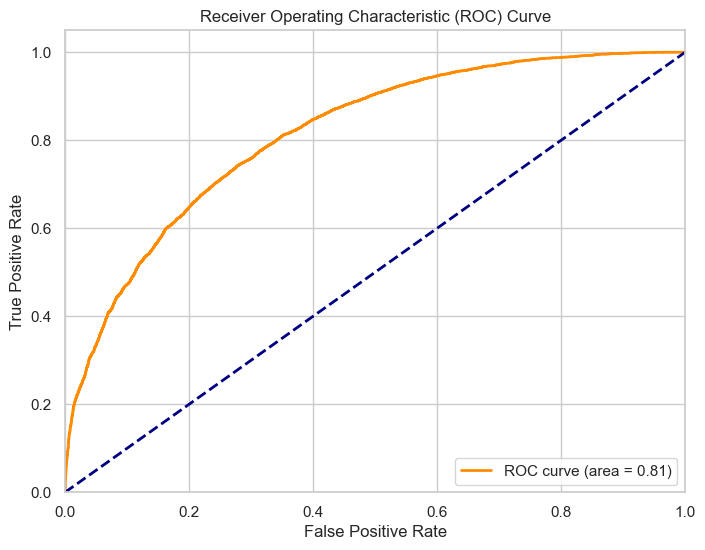

Area Under Curve (AUC): 0.81


In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcul de l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Area Under Curve (AUC): {:.2f}".format(roc_auc))


*Commentaires*  

Le modèle de régression logistique utilisé pour prédire l'attrition des employés montre des performances équilibrées en termes de précision, rappel et score F1 pour les deux classes, avec des valeurs autour de 0.72-0.74. Cela indique que le modèle traite les deux classes de manière relativement équilibrée.

L'AUC (Aire sous la courbe ROC) de 0.81 indique une bonne capacité du modèle à distinguer entre les classes positives et négatives. Une AUC proche de 1.0 suggère une excellente performance du modèle, tandis qu'une AUC de 0.5 indiquerait une performance aléatoire. La courbe ROC montre un bon écart par rapport à la ligne diagonale, ce qui confirme la capacité du modèle à classifier correctement les observations avec une probabilité significative.

Les preuves indiquent que le modèle n'est ni en sur-apprentissage ni en sous-apprentissage, mais semble plutôt atteindre un bon compromis entre biais et variance. Cela est particulièrement soutenu par l'AUC élevée et les performances équilibrées sur les métriques de classification, qui montrent que le modèle est capable de bien généraliser sur des données nouvelles, sans être trop simpliste ni trop complexe pour les données à disposition.

*Visualisation par le biais d'un histogramme pour rendre clair les résultats trouvés*

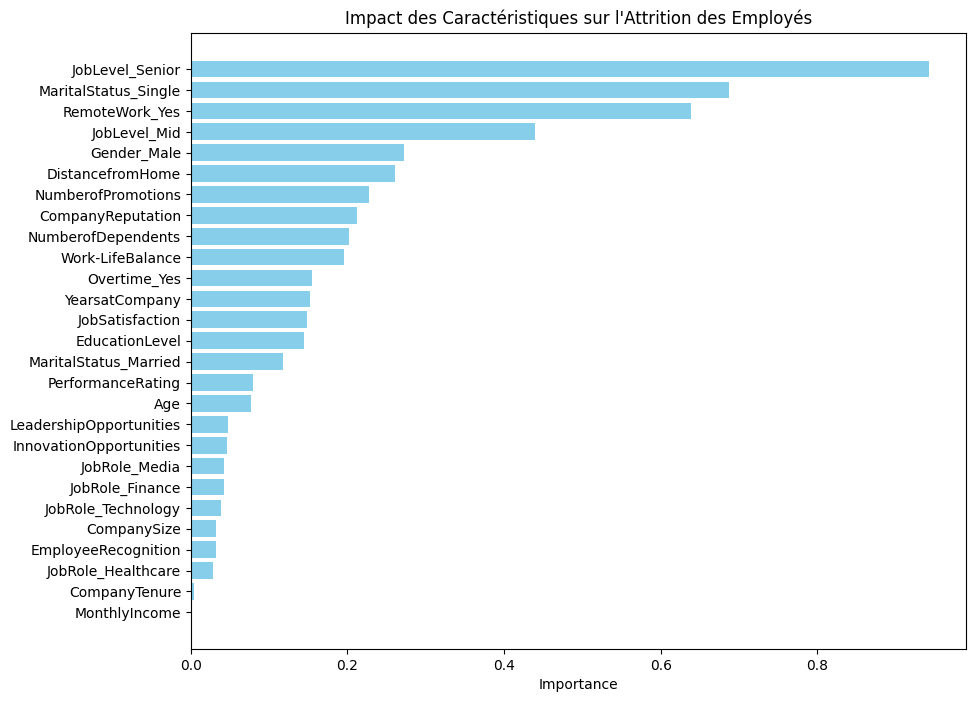

In [29]:
import matplotlib.pyplot as plt

# Trier les données pour la visualisation
sorted_coef = coef_df.sort_values(by='Importance', ascending=True)

# Création de l'histogramme
plt.figure(figsize=(10, 8))
plt.barh(sorted_coef['Feature'], sorted_coef['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Impact des Caractéristiques sur l\'Attrition des Employés')
plt.show()


Cross-Validation Accuracy: 72.69%
Cross-Validation Standard Deviation: 0.25%

Confusion Matrix (Cross-Validation):
 [[17462  6034]
 [ 6173 15029]]

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     23496
           1       0.71      0.71      0.71     21202

    accuracy                           0.73     44698
   macro avg       0.73      0.73      0.73     44698
weighted avg       0.73      0.73      0.73     44698



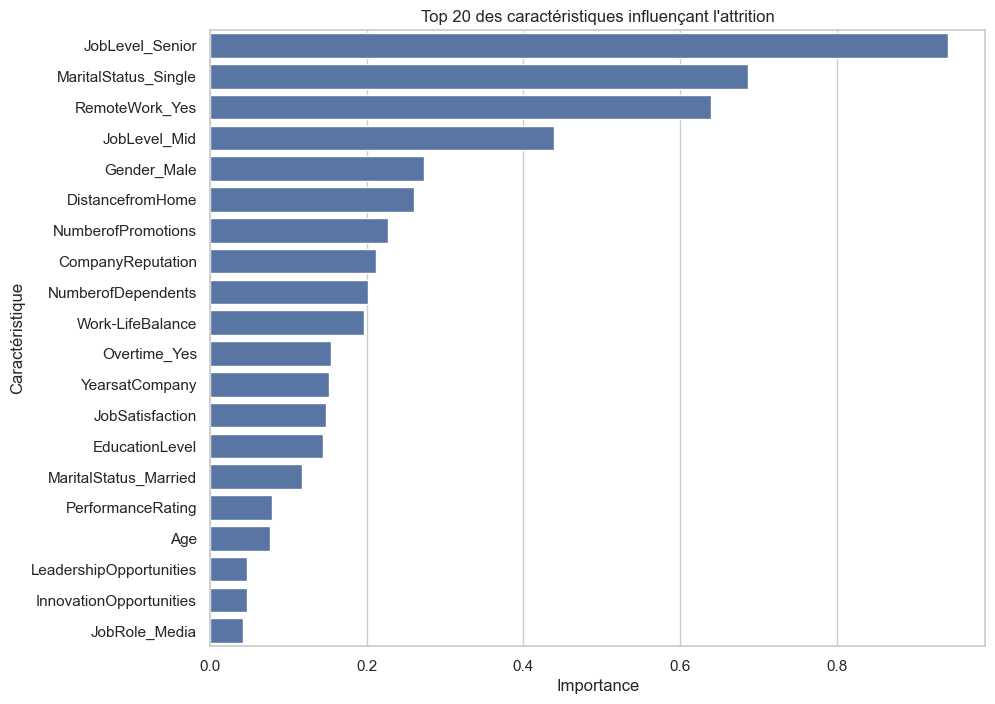

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

# Configuration de seaborn pour l'esthétique des graphiques
sns.set(style="whitegrid")

# Création de l'instance du modèle
model = LogisticRegression(max_iter=1000)  # Augmenter max_iter si nécessaire

# Validation croisée
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(model, X_train_scaled, y_train, cv=5)

# Évaluation de la validation croisée
cv_accuracy = cv_scores.mean()
cv_std = cv_scores.std()

# Affichage des résultats de la validation croisée
print(f"Cross-Validation Accuracy: {cv_accuracy * 100:.2f}%")
print(f"Cross-Validation Standard Deviation: {cv_std * 100:.2f}%\n")

# Matrice de confusion et rapport de classification
conf_matrix_cv = confusion_matrix(y_train, cv_predictions)
class_report_cv = classification_report(y_train, cv_predictions)

print("Confusion Matrix (Cross-Validation):\n", conf_matrix_cv)
print("\nClassification Report (Cross-Validation):\n", class_report_cv)

# Entraînement du modèle pour obtenir les coefficients finaux
model.fit(X_train_scaled, y_train)
coefficients = model.coef_.flatten()

# Création du DataFrame pour visualiser les coefficients
feature_names = X_train_scaled.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances des caractéristiques
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=coef_df.head(20))
plt.title('Top 20 des caractéristiques influençant l\'attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()


*Commentaires*  
La validation croisée permet d'obtenir une estimation plus robuste de la performance du modèle en utilisant plusieurs partitions des données, ce qui peut réduire le risque de surajustement et fournir une estimation plus précise de la performance du modèle sur de nouvelles données.  

Le modèle de régression logistique que nous avons utilisé pour prédire l'attrition des employés a été évalué sur deux ensembles de données différents : l'ensemble d'entraînement et l'ensemble de test. La précision du modèle sur l'ensemble de test est de 73.11%, ce qui signifie qu'il prédit correctement les résultats 73.11% du temps sur les données qu'il n'a pas vues pendant l'entraînement.

De plus, nous avons utilisé la validation croisée pour obtenir une estimation plus robuste de la performance du modèle. La précision de la validation croisée est également de 72.69%, avec un écart type faible de 0.25%. Cela indique que les performances du modèle sont stables et cohérentes sur différentes partitions des données, ce qui suggère une bonne généralisation du modèle.

2. Forêts Aléatoires : modèle ensembliste

In [34]:
# Importation des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

# Définition de la grille de paramètres à explorer
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_features': [None, 'sqrt'],
    'max_depth': [None, 5, 7, 14, 21],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [3, 4, 5],
    'bootstrap': [True, False]
}

# Initialisation du modèle et de la recherche de paramètres
rf = RandomForestClassifier(random_state=92)
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='roc_auc',
                            n_iter=100, cv=5, random_state=92, n_jobs=-1)

# Entraînement du modèle avec recherche de paramètres
rf_cv.fit(X_train, y_train)

# Affichage des meilleurs paramètres et de la performance
print("Grid Search CV Best = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

# Évaluation du modèle optimisé sur l'ensemble de test
best_model = rf_cv.best_estimator_
y_pred = best_model.predict(X_test)
print("Performance sur l'ensemble de test:")
print("AUC-ROC:", best_model.score(X_test, y_test))

c:\Users\youmn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


19 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\youmn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\youmn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\youmn\AppD

Grid Search CV Best = 0.837
Best Params: RandomForestClassifier(max_depth=21, min_samples_leaf=4, n_estimators=500,
                       random_state=92)
Performance sur l'ensemble de test:
AUC-ROC: 0.7465771812080537


*Commentaires* 

Performance du modèle optimisé  
Meilleur score AUC-ROC sur validation croisée : 0.837, ce qui est un excellent score, indiquant que le modèle est capable de distinguer efficacement entre les classes positives et négatives.
Performance sur l'ensemble de test (AUC-ROC) : 0.747, ce qui est inférieur au score de validation croisée. Cette différence peut signaler une certaine sur-adaptation aux données de formation ou une variance qui pourrait être adressée avec un ajustement plus fin des paramètres ou une augmentation de la régularisation.

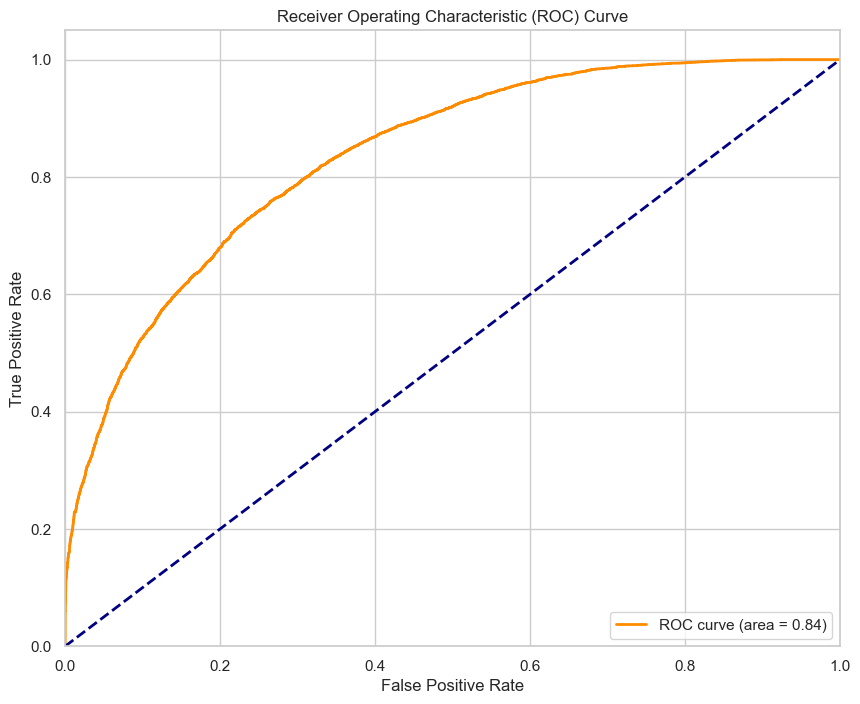

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités pour l'ensemble de test
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs et vrais positifs et les seuils
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


                 Feature  Importance
19  MaritalStatus_Single        0.11
23       JobLevel_Senior        0.10
21        RemoteWork_Yes        0.07
8       DistancefromHome        0.07
0             EmployeeID        0.07
3          MonthlyIncome        0.07
12         CompanyTenure        0.06
4       Work-LifeBalance        0.06
2         YearsatCompany        0.05
1                    Age        0.05


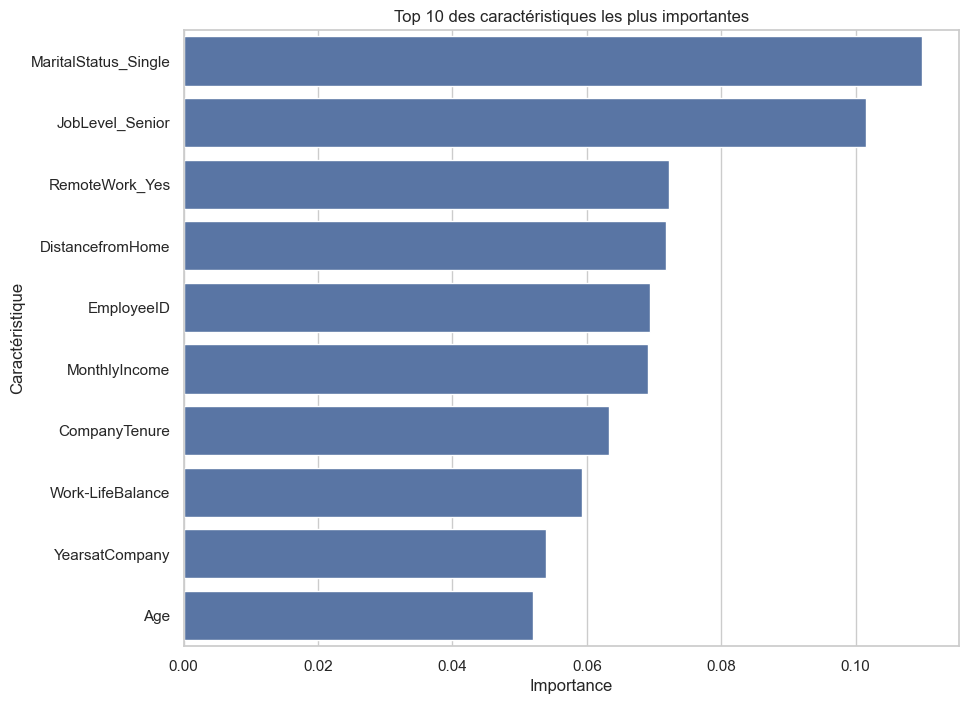

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Préparation des données: suppose que X et y sont déjà définis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

# Entraînement du modèle Random Forest
rf = RandomForestClassifier(n_estimators=500, max_depth=21, min_samples_leaf=4,
                             max_features=None, bootstrap=False, random_state=92)
rf.fit(X_train, y_train)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtenir l'importance des caractéristiques
feature_importances = rf.feature_importances_

# Créer un DataFrame pour visualiser les importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les dix premières caractéristiques les plus importantes
print(features_df.head(10))

# Visualisation des importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 des caractéristiques les plus importantes')
sns.barplot(data=features_df.head(10), x='Importance', y='Feature', orient='h')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()


In [39]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

# Définition de la grille de paramètres à explorer
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_features': [None, 'sqrt'],
    'max_depth': [None, 5, 7, 14, 21],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [3, 4, 5],
    'bootstrap': [True, False]
}

# Initialisation du modèle Random Forest avec les paramètres optimisés
rf_best = RandomForestClassifier(n_estimators=500, max_depth=21, min_samples_leaf=4,
                                 max_features=None, bootstrap=False, random_state=92)

# Réalisation de la validation croisée
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Affichage des scores de validation croisée et la moyenne
print("Scores AUC ROC de la validation croisée:", cv_scores)
print("Moyenne des scores AUC ROC:", cv_scores.mean())


Scores AUC ROC de la validation croisée: [0.73193252 0.73657956 0.7400955  0.72459794 0.73499066]
Moyenne des scores AUC ROC: 0.7336392341975881


Conclusions & Recommandations :  

L'analyse approfondie réalisée à l'aide des modèles de régression logistique et de forêts aléatoires a permis de mettre en lumière plusieurs aspects clés concernant les facteurs d'attrition et les stratégies de rétention des employés. Les résultats indiquent que des facteurs tels que la satisfaction au travail, les conditions de travail, les politiques de rémunération et les opportunités de développement professionnel jouent un rôle significatif dans la décision des employés de rester dans l'entreprise ou de la quitter.  

